In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

path = '/content/gdrive/My Drive/__학교/알고리즘/팀플/JgDiff/'

import sys
sys.path.append(path)

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, LinearRegression, Ridge, LogisticRegression
from sklearn.kernel_ridge import KernelRidge
sys.path.insert(0, '..')
import bigdata

from sklearn.neighbors.kde import KernelDensity
import scipy.stats as st

In [0]:
def trainSet(t):
    return t[t['matchId'].apply(lambda x: int(x)%5!=0)]

def testSet(t):
    return t[t['matchId'].apply(lambda x: int(x)%5==0)]

In [0]:
champions = pd.read_csv(path+"/supplement/champions.csv")
champions = champions.reset_index().set_index('id')

In [0]:
matchroles = pd.read_csv(path+"/supplement/matchrole.csv")
matchroles_tr = trainSet(matchroles).reset_index(drop=True)
matchroles_ts = testSet(matchroles).reset_index(drop=True)

In [0]:
kills = pd.read_csv(path+"/supplement/kills.csv")
kills.assist = kills.fillna(-1).assist.apply(lambda x: str(int(x)))
kills_tr = trainSet(kills).reset_index(drop=True)
kills_ts = testSet(kills).reset_index(drop=True)

In [0]:
objects = pd.read_csv(path+"/supplement/objects.csv")
objects_tr = trainSet(objects).reset_index(drop=True)
objects_ts = testSet(objects).reset_index(drop=True)

In [0]:
playerFrame = pd.read_csv(path+"/supplement/playerFrameTable.csv")

In [0]:
modified_pos = bigdata.diagTransform(playerFrame[['position_x', 'position_y']].values)

playerFrame['x'] = modified_pos[:,0]
playerFrame['y'] = modified_pos[:, 1]
playerFrame['team'] = (playerFrame['participantId'] > 5).astype(int)
playerFrame['x_'] = playerFrame['x'] * (2*playerFrame['team']-1)

playerFrame_tr = trainSet(playerFrame)
playerFrame_ts = testSet(playerFrame)

# Starting Position per Team & Champion

In [0]:
def startpos_map(teamJ, cId, savepath):
    X = teamJ[cId][['position_x', 'position_y']].values

    xx, yy = np.mgrid[0:15000:100j, 0:15000:100j]

    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([X[:,0], X[:,1]])
    kernel = st.gaussian_kde(values)

    f = np.reshape(kernel(positions).T, xx.shape)

    plt.contourf(xx, yy, f, cmap='coolwarm')
    plt.savefig(savepath)

In [112]:

blue_jgstart = playerFrame_tr[(playerFrame_tr.frame == 1) & (matchroles.set_index('matchId').loc[playerFrame_tr.matchId]['Jgl_0_id '].values == playerFrame_tr.participantId)]
red_jgstart = playerFrame_tr[(playerFrame_tr.frame == 1) & (matchroles.set_index('matchId').loc[playerFrame_tr.matchId]['Jgl_1_id'].values == playerFrame_tr.participantId)]

blue_jgstart['jg_champion'] = matchroles.set_index('matchId').loc[blue_jgstart.matchId]['Jgl_0_ch'].values
red_jgstart['jg_champion'] = matchroles.set_index('matchId').loc[red_jgstart.matchId]['Jgl_1_ch'].values

bj = dict(list(blue_jgstart.groupby('jg_champion')))
rj = dict(list(red_jgstart.groupby('jg_champion')))

for i, items in bj.items():
    if len(items) < 100:
        continue
    startpos_map(bj, i, path+'results/StartPosition/Blue/'+champions.loc[i]['name']+'.png') 

for i, items in rj.items():
    if len(items) < 100:
        continue
    startpos_map(rj, i, path+'results/StartPosition/Red/'+champions.loc[i]['name']+'.png') 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
blue_jgstart2 = playerFrame_tr[(playerFrame_tr.frame == 2) & (matchroles.set_index('matchId').loc[playerFrame_tr.index]['Jgl_0_id '] == playerFrame_tr.participantId)]
red_jgstart2 = playerFrame_tr[(playerFrame_tr.frame == 2) & (matchroles.set_index('matchId').loc[playerFrame_tr.index]['Jgl_1_id'] == playerFrame_tr.participantId)]

blue_jgstart2['jg_champion'] = matchroles.set_index('matchId').loc[blue_jgstart2.index]['Jgl_0_ch'].values
red_jgstart2['jg_champion'] = matchroles.set_index('matchId').loc[red_jgstart2.index]['Jgl_1_ch'].values

bj2 = dict(list(blue_jgstart2.groupby('jg_champion')))
rj2 = dict(list(red_jgstart2.groupby('jg_champion')))


for i, items in bj.items():
    if len(items) < 100:
        continue
    startpos_map(bj2, i, path+'results/StartPosition/Blue2/'+champions.loc[i]['name']+'.png') 
    
for i, items in rj.items():
    if len(items) < 100:
        continue
    startpos_map(rj2, i, path+'results/StartPosition/Red2/'+champions.loc[i]['name']+'.png') 

In [0]:
blue_jgstart3 = playerFrame_tr[(playerFrame_tr.frame == 3) & (matchroles.set_index('matchId').loc[playerFrame_tr.index]['Jgl_0_id '] == playerFrame_tr.participantId)]
red_jgstart3 = playerFrame_tr[(playerFrame_tr.frame == 3) & (matchroles.set_index('matchId').loc[playerFrame_tr.index]['Jgl_1_id'] == playerFrame_tr.participantId)]

blue_jgstart3['jg_champion'] = matchroles.set_index('matchId').loc[blue_jgstart3.index]['Jgl_0_ch'].values
red_jgstart3['jg_champion'] = matchroles.set_index('matchId').loc[red_jgstart3.index]['Jgl_1_ch'].values

bj3 = dict(list(blue_jgstart3.groupby('jg_champion')))
rj3 = dict(list(red_jgstart3.groupby('jg_champion')))


for i, items in bj.items():
    if len(items) < 100:
        continue
    startpos_map(bj3, i, path+'results/StartPosition/Blue3/'+champions.loc[i]['name']+'.png') 
    
for i, items in rj.items():
    if len(items) < 100:
        continue
    startpos_map(rj3, i, path+'results/StartPosition/Red3/'+champions.loc[i]['name']+'.png') 

In [75]:
matchroles

,Unnamed: 0,matchId,Top_0_id,Jgl_0_id,Mid_0_id,Bot_0_id,Sup_0_id,Top_1_id,Jgl_1_id,Mid_1_id,Bot_1_id,Sup_1_id,Top_0_ch,Jgl_0_ch,Mid_0_ch,Bot_0_ch,Sup_0_ch,Top_1_ch,Jgl_1_ch,Mid_1_ch,Bot_1_ch,Sup_1_ch
0,0,3273218631,4,5,3,2,1,9,7,10,6,8,122,56,30,18,12,133,164,34,8,9
1,1,3273221800,1,3,2,4,5,7,6,9,8,10,80,163,4,81,201,79,107,55,202,25
2,2,3278904898,5,2,4,3,1,8,10,9,7,6,58,28,4,106,25,30,141,55,202,26
3,3,3287833940,2,5,4,3,1,6,9,7,8,10,27,141,266,202,555,36,35,126,61,53
4,4,3292739224,3,2,5,1,4,6,8,10,7,9,27,164,103,81,25,126,141,3,145,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18373,18373,3956480499,2,4,5,1,3,7,10,9,6,8,126,11,44,67,117,31,64,136,145,40
18374,18374,3956483153,4,5,1,2,3,8,9,10,6,7,126,76,268,22,25,85,64,127,110,16
18375,18375,3956483610,1,4,2,3,5,8,10,9,6,7,240,30,84,18,89,114,64,8,145,412
18376,18376,3956484460,2,4,1,5,3,8,9,6,7,10,8,154,4,51,223,85,60,39,498,111


# Which Lane will be ganked first?

In [0]:
def onehot_11(index):
    a = np.zeros(11)
    a[int(index)] = 1
    return a

In [0]:
kills['kill_onehot'] = kills.killer.apply(onehot_11)
kills['assist_onehot'] = kills.assist.apply(lambda x: np.zeros(11) if x=='-1' else np.sum(np.array([onehot_11(i) for i in x]), axis=0))
kills['victim_onehot'] = kills.victim.apply(onehot_11)

kills['frame'] = (kills['timestamp'] / 60000).astype(int)

In [0]:
m = matchroles.set_index('matchId').loc[kills.matchId].reset_index()
ka_onehot = kills['kill_onehot']+kills['assist_onehot']
ka_onehot = np.array([x for x in ka_onehot])

In [0]:
kills['jg_related'] = ka_onehot[range(len(m)), m['Jgl_0_id '].to_numpy()] + ka_onehot[range(len(m)), m['Jgl_1_id'].to_numpy()]

In [0]:
kills['team'] = (kills['killer'] > 5).astype(int)

In [0]:
kills_tr = trainSet(kills).reset_index(drop=True)
kills_ts = testSet(kills).reset_index(drop=True)

In [123]:
kills_tr

,Unnamed: 0,matchId,timestamp,x,y,killer,victim,assist,kill_onehot,assist_onehot,victim_onehot,frame,jg_related,team
0,0,3.273219e+09,156537.0,7389.0,11194.0,10.0,3.0,7,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,1.0,1
1,1,3.273219e+09,232722.0,5890.0,8631.0,7.0,5.0,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",3,1.0,1
2,2,3.273219e+09,237837.0,6324.0,8606.0,9.0,3.0,7,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3,1.0,1
3,3,3.273219e+09,240813.0,5633.0,8549.0,3.0,10.0,5,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4,1.0,0
4,4,3.273219e+09,255598.0,1206.0,11156.0,9.0,4.0,-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",4,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643898,809769,3.956497e+09,1872026.0,6398.0,1490.0,8.0,3.0,976,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, ...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",31,1.0,1
643899,809770,3.956497e+09,1875726.0,4705.0,952.0,6.0,5.0,9,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",31,0.0,1
643900,809771,3.956497e+09,1877050.0,4945.0,814.0,8.0,1.0,976,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, ...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",31,1.0,1
643901,809772,3.956497e+09,1877512.0,6134.0,876.0,5.0,10.0,41,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",31,1.0,0


In [0]:
blue_jgkill = kills_tr[(kills_tr['jg_related']==1) & (kills_tr.team == 0)].groupby('matchId').first()
blue_jgkill['jg_champ'] = matchroles.set_index('matchId').loc[blue_jgkill.index]['Jgl_0_ch']

In [0]:
red_jgkill = kills_tr[(kills_tr['jg_related']==1) & (kills_tr.team == 1)].groupby('matchId').first()
red_jgkill['jg_champ'] = matchroles.set_index('matchId').loc[red_jgkill.index]['Jgl_1_ch']

In [131]:
len(blue_jgkill)

14254

In [0]:
def killpos_map(teamJ, cId, savepath=''):
    X = teamJ[cId][['x', 'y']].values

    xx, yy = np.mgrid[0:15000:100j, 0:15000:100j]

    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([X[:,0], X[:,1]])
    kernel = st.gaussian_kde(values)

    f = np.reshape(kernel(positions).T, xx.shape)

    plt.contourf(xx, yy, f, cmap='coolwarm')
    if savepath != '':
        plt.savefig(savepath)

In [133]:
len(blue_jgkill)

14254

In [134]:
len(blue_jgstart)

14619

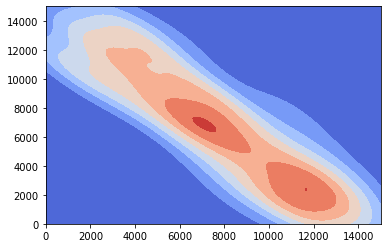

In [135]:
rk = dict(list(red_jgkill.groupby('jg_champ')))
bk = dict(list(blue_jgkill.groupby('jg_champ')))

for i, items in bk.items():
    if len(items) < 100:
        continue
    killpos_map(bk, i, path+'results/FirstKillPosition/Blue/'+champions.loc[i]['name']+'.png') 
    
for i, items in rk.items():
    if len(items) < 100:
        continue
    killpos_map(rk, i, path+'results/FirstKillPosition/Red/'+champions.loc[i]['name']+'.png') 

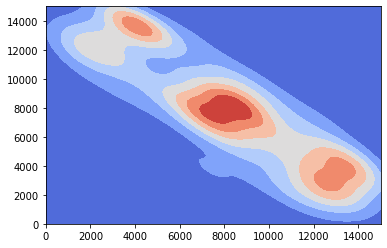

In [89]:
killpos_map(dict(list(blue_jgkill.groupby('jg_champ'))), 64)

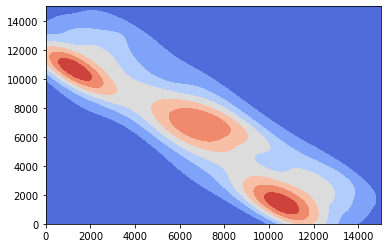

In [87]:
killpos_map(dict(list(red_jgkill.groupby('jg_champ'))), 60)

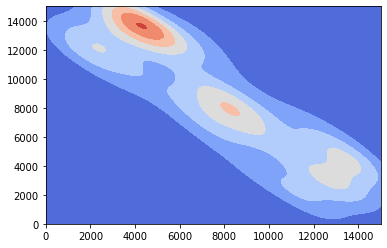

In [88]:
killpos_map(dict(list(blue_jgkill.groupby('jg_champ'))), 60)

In [65]:
np.argsort(matchroles.iloc[:,2:12].to_numpy()-1, axis=1)+1

array([[ 5,  4,  3, ..., 10,  6,  8],
       [ 1,  3,  2, ...,  9,  8, 10],
       [ 5,  2,  4, ...,  6,  8,  7],
       ...,
       [ 1,  3,  4, ...,  6,  8,  7],
       [ 3,  1,  5, ...,  6,  7, 10],
       [ 4,  1,  3, ...,  8, 10,  9]])

In [62]:
matchroles.iloc[:,2:12]

,Top_0_id,Jgl_0_id,Mid_0_id,Bot_0_id,Sup_0_id,Top_1_id,Jgl_1_id,Mid_1_id,Bot_1_id,Sup_1_id
0,4,5,3,2,1,9,7,10,6,8
1,1,3,2,4,5,7,6,9,8,10
2,5,2,4,3,1,8,10,9,7,6
3,2,5,4,3,1,6,9,7,8,10
4,3,2,5,1,4,6,8,10,7,9
...,...,...,...,...,...,...,...,...,...,...
18373,2,4,5,1,3,7,10,9,6,8
18374,4,5,1,2,3,8,9,10,6,7
18375,1,4,2,3,5,8,10,9,6,7
18376,2,4,1,5,3,8,9,6,7,10


In [255]:
kills['kill_onehot']+kills['assist_onehot']

0         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...
1         [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...
2         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...
3         [0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...
4         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                                ...                        
809769    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, ...
809770    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...
809771    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, ...
809772    [0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...
809773    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, ...
Length: 809774, dtype: object